<a href="https://colab.research.google.com/github/ACE-Hamza/SMA_Grp-4/blob/main/SMA_reddit_Collection_and_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Authorization and Generation of Access Tokens 

- To generate key pair, go to https://www.reddit.com/prefs/apps and click on create an app
- This will require login, and the generation of access token in the future will require your username and password.

In [ ]:
CLIENT_ID = 'eFKFU6OeS-I93RBU3YQ3Nw'
SECRET_KEY = 'wx6pzt5scEEtDL-95t0TLD57cVompA'

In [ ]:
import requests

In [ ]:
auth = requests.auth.HTTPBasicAuth(CLIENT_ID, SECRET_KEY)

In [ ]:
# with open('pswd.txt', 'r') as f:
#   pw = f.read()

In [ ]:
data = {
    'grant_type': 'password',
    'username': 'Easy_College_1359',
    'password': 'knowledge_capsule'
}

headers = {
    'User-Agent': 'SMA/0.0.1'
}

params = {
    'limit': 100
}

In [ ]:
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

In [ ]:
TOKEN = res.json()['access_token']

In [ ]:
headers['Authorization'] = f'bearer {TOKEN}'

## Fetching data using a get request

In [ ]:
res = requests.get('https://oauth.reddit.com/search/?q=AI%20art',
                   headers=headers, params=params)

In [ ]:
data = res.json()

## Saving and Loading data in JSON format

In [ ]:
import json

In [ ]:
json_string = json.dumps(data)

In [ ]:
with open('data.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [ ]:
queries = ["AI art",
           "AI art (sorted by comments)",
           "AI",
           "",
           ""]

In [ ]:
 # Opening JSON file
with open('data.json', 'r') as openfile:
 
    # Reading from json file
    json_object = json.load(openfile)

In [ ]:
# json_object

## Converting data into a DataFrame and storing it as CSV

In [ ]:
import pandas as pd

In [ ]:
type(json_object)

str

In [ ]:
json_dict = json.loads(json_object)

In [ ]:
# json_dict['data']['children']

In [ ]:
data_dict = {}
ptr = 0
for i in json_dict['data']['children']:
  ptr += 1
  data_dict[ptr] = i['data']

In [ ]:
# data_dict

In [ ]:
df = pd.DataFrame(data_dict)

In [ ]:
df = df.T

In [ ]:
df.to_csv("data.csv")

In [ ]:
df.iloc[0:10, 110:115]

,is_gallery,media_metadata,gallery_data,poll_data,author_cakeday
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN


In [ ]:
# for i in df.columns:
#   print(i)

## CLEANING

In [ ]:
columns = ["subreddit", "selftext",	"author_fullname", "gilded", "title", "upvote_ratio", "created_utc",	
           "ups",	"total_awards_received", "num_crossposts", "is_reddit_media_domain", "link_flair_text",
           "score", "post_hint", "all_awardings", "subreddit_id", "id", "author", "num_comments", "url",
           "permalink"]

In [ ]:
df = df[columns]

In [ ]:
df.to_csv("data.csv")

In [ ]:
# Merging search results from all the queries

data2 = pd.read_csv("data2.csv")
data3 = pd.read_csv("data3.csv")

data2 = data2[columns]
data3 = data3[columns]

df = df.append(data2)
df = df.append(data3)

In [ ]:
# Dropping duplicates
df = df.drop_duplicates(subset=['id'], keep='first')

In [ ]:
df.to_csv("data.csv")

## Visualizations 

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

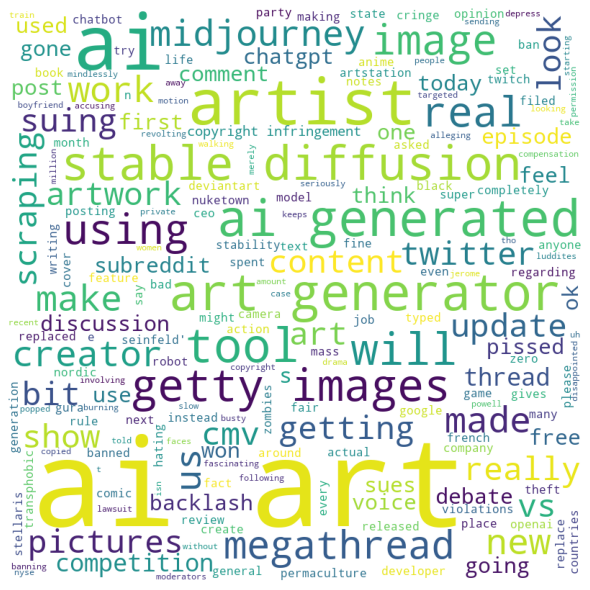

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df["title"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Lemmatization

In [9]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [10]:
# import these modules
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))


rocks : rock
corpora : corpus
better : good


## Getting the top 10 most occuring lexemes (other than stop wprds)

In [1]:
import pandas as pd
import re

In [4]:
titles = pd.read_csv('/content/clean_data.csv')['title']

In [5]:
counter = dict()

In [6]:
from wordcloud import STOPWORDS

In [11]:
for val in titles:
     
    # typecaste each val to string
    val = str(val)

    # removing all special characters and punctuations
    val = re.sub(r'[^\w\s]', '', val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        tokens[i] = lemmatizer.lemmatize(tokens[i])
        if tokens[i] not in STOPWORDS:
          if tokens[i] in counter:
            counter[tokens[i]] += 1
          else:
            counter[tokens[i]] = 1

In [12]:
from operator import itemgetter

In [13]:
res = dict(sorted(counter.items(), key = itemgetter(1), reverse = True)[:10])

In [14]:
res

{'ai': 130,
 'art': 114,
 'artist': 17,
 'image': 15,
 'generator': 10,
 'stable': 9,
 'diffusion': 9,
 'getty': 8,
 'tool': 8,
 'will': 8}